# Parsowanie plików
Procedura parsowania wygląda następująco
1. Patrzymy na plik z symulacji/pomiaru, sprawdzamy którą kolumnę i wiersze mamy wczytać
2. Następnie podajemy argumenty klasy processFile:
    a) arrname - nazwa tablicy w której będą dane
    b) filename  - nazwa pliku który otworzymy
    c) start - pierwszy wiersz jaki będzie wczytany
    d) end - ostatni wiersz jaki będzie wczytany
    e) col - numer kolumny która będzie wczytana
    f) dgb - flaga do debugowania (nie używać)
    g) magic_time - wyniki pomiarów z oscyloskopu mają nietypowy format np. wyglądają tak "17:53:58,785136", jeśli magic_time jest true pierwsza część jest ucinana a druga parsowana (ostatecznie otrzymamy tutaj "785136")
3. Kopiujemy tak uzyskane wyjścid do pola z kodem

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

def printArray(name,array):
    line = name
    line +=str("=np.array([")
    size = array.size
    for i in range(0, size-1):
        line +=str(str(array[i])+",")
    line += str(str(array[size-1])+"])")
    print(line)
    
def processFile(arrname, filename, start=0, end=10, col=0, dbg=False, magic_time=False, step=1):
    lineNo = 0
    res = []
    with open(filename) as infile:
        for line in infile:
            lineNo+=1
            if(lineNo>=start and lineNo<=end):
                array = line.split()
                if lineNo%step !=0:
                    continue
                if dbg:
                    print(array[col])
                try:
                    if magic_time:
                        temp = array[col]
                        temp = temp.split(',')
                        res.append(int(temp[1]))
                    else:
                        array[col] = array[col].replace(',',".")
                        res.append(float(array[col]))
                except Exception as error:
                    print(error)
                    pass
    
    nparr = np.array(res)
    if dbg:
        print(nparr)
        print("size ",nparr.size)
    return printArray(arrname, np.array(res))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

def makePhasePlotSim(freq, gain, phase, freqHz=0., ):
    G = gain.copy()
    F = freq.copy()
    P = phase.copy()
    fig, axes = plt.subplots(2,1)
    fig.set_size_inches(8,8)
    axes[0].plot(F,G,"#ff0000")
    axes[1].plot(F,P,"#00ff00")
    axes[0].set_xscale('log')
    axes[1].set_xscale('log')
    axes[0].set_xlabel("freq (Hz)")
    axes[1].set_xlabel("freq (Hz)")
    axes[0].set_ylabel("Amp (dB)")
    axes[1].set_ylabel("phase (deg)")
    if freqHz!=0:
        axes[0].axvline(freqHz,color="b",linestyle="dotted")
        axes[1].axvline(freqHz,color="b",linestyle="dotted")
    axes[0].grid(True)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()
    
def makePhasePlotSim2(freq1, gain1, phase1,freq2, gain2, phase2):
  #  freq = processFile(filename, start_line,end_line, col=0)
  #  gain = processFile(filename, start_line,end_line, col=1)
  #  phase = processFile(filename, start_line,end_line, col=3,dbg=False)
    G1 = gain1.copy()*(-1.)
    G2 = gain2.copy()*(-1.)
    P1 = phase1.copy()
    P2 = phase2.copy()
    F1 = freq1.copy()
    F2 = freq2.copy()
    fig, axes = plt.subplots(2,1)
    fig.set_size_inches(8,8)
    axes[0].plot(F1,G1,"#ff0000",label="sim")
    axes[1].plot(F1,P1,"#ff0000",label="sim")
    axes[0].plot(F2,G2,"#00ff00",marker="o",label="data")
    axes[1].plot(F2,P2,"#00ff00",marker="o",label="data")
    axes[0].set_xscale('log')
    axes[1].set_xscale('log')
    axes[0].set_xlabel("freq (Hz)")
    axes[1].set_xlabel("freq (Hz)")
    axes[0].set_ylabel("Amp (dB)")
    axes[1].set_ylabel("phase (deg)")
    axes[0].grid(True)
    axes[1].grid(True)
    axes[1].legend(loc="lower right")
    axes[0].legend(loc="lower left")
    axes[1].grid(True)
    plt.tight_layout()
    plt.show()    
    

def makeOscPlot(t1, ch1, t2, ch2, offset = 0):
    fig, axes = plt.subplots(1,1)
    t1_copy = t1.copy() - offset
    t2_copy = t2.copy()-offset
    axes.plot(t1_copy,ch1,"#ff0000",label="ch1 (source)")
    axes.plot(t2_copy,ch2,"#0000ff",label="ch2 (response)")
    axes.set_xlabel("t (us)")
    axes.set_ylabel("U (V)")
    axes.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

class osci_data:
    def __init__(self): 
        self.t1= None # czas 1 
        self.t2 = None
        self.ch1= None # kanal 1
        self.ch2 = None
    
class filter_dataset:
    def __init__(self):
        self.freq_data=None
        self.freq_sim=None
        self.phase_data=None
        self.phase_sim = None
        self.gain_data = None
        self.gain_sim = None
        self.freq_01_sim = osci_data()
        self.freq_10_sim = osci_data()
        self.freq_01_data = osci_data()
        self.freq_10_data = osci_data()

## Filtr dolnoprzepustowy:

Dane:

# <font color="red">Parsowanie do tablic:</font>

In [19]:

processFile("freq_sim","data/gor_bode.txt",4,14,0)
processFile("gain_sim","data/gor_bode.txt",4,14,1)
processFile("phase_sim","data/gor_bode.txt",4,14,2)

processFile("freq_data","data/gor_bode_real.txt",4,14,0)
processFile("gain_data","data/gor_bode_real.txt",4,14,1)
processFile("phase_data","data/gor_bode_real.txt",4,14,2)

nLines = 506
nStart = 6
nStep = 1
path = "data/100_hz_gor.txt"

processFile("t1_01_sim",path,nStart,nLines,1,magic_time=True, step=nStep)
processFile("t2_01_sim",path,nStart,nLines,4,magic_time=True, step=nStep)

processFile("ch1_01_sim",path,nStart,nLines,2, step=nStep)
processFile("ch2_01_sim",path,nStart,nLines,5, step=nStep)


nLines = 2506
nStep =100
path = "data/100_hz_gor_real.txt"
processFile("t1_01_data",path,nStart,nLines,1,magic_time=True, step=nStep)
processFile("t2_01_data",path,nStart,nLines,4,magic_time=True,step=nStep)

processFile("ch1_01_data",path,nStart,nLines,2,step=nStep)
processFile("ch2_01_data",path,nStart,nLines,5,step=nStep)


nLines = 506
nStep =50
path = "data/10k_hz_gor_real.txt"
processFile("t1_10_data",path,nStart,nLines,1,magic_time=True, step=nStep)
processFile("t2_10_data",path,nStart,nLines,4,magic_time=True,step=nStep)
processFile("ch1_10_data",path,nStart,nLines,2,step=nStep)
processFile("ch2_10_data",path,nStart,nLines,5,step=nStep)


nLines = 506

path = "data/10k_hz_gor.txt"

processFile("t1_10_sim",path,nStart,nLines,1,magic_time=True, step=nStep)
processFile("t2_10_sim",path,nStart,nLines,4,magic_time=True,step=nStep)
processFile("ch1_10_sim",path,nStart,nLines,2, step=nStep)
processFile("ch2_10_sim",path,nStart,nLines,5, step=nStep)



freq_sim=np.array([100.0,158.489,251.189,398.107,630.957,1000.0,1584.893,2511.886,3981.072,6309.573,10000.0])
gain_sim=np.array([-20.383,-16.442,-12.589,-8.936,-5.703,-3.185,-1.556,-0.687,-0.287,-0.116,-0.047])
phase_sim=np.array([84.509,81.337,76.424,69.058,58.761,46.13,33.278,22.496,14.644,9.362,5.939])
freq_data=np.array([100.024,158.511,251.271,398.047,630.878,1000.054,1584.925,2511.963,3981.031,6309.524,9999.983])
gain_data=np.array([-20.527,-16.594,-12.732,-9.09,-5.866,-3.342,-1.705,-0.73,-0.304,-0.133,-0.051])
phase_data=np.array([84.672,81.223,76.54,68.792,58.851,46.248,33.547,22.758,14.874,9.666,5.949])
t1_01_sim=np.array([336829,336929,337029,337129,337229,337329,337429,337529,337629,337729,337829,337929,338029,338129,338229,338329,338429,338529,338629,338729,338829,338929,339029,339129,339229,339329,339429,339529,339629,339729,339829,339929,340029,340129,340229,340329,340429,340529,340629,340729,340829,340929,341029,341129,341229,341329,341429,341529,341629,341729,341829,341

In [29]:
# tutaj tworzymy wypełnione tablice
# bode:
freq_sim=np.array([100.0,158.489,251.189,398.107,630.957,1000.0,1584.893,2511.886,3981.072,6309.573,10000.0])
gain_sim=np.array([-20.383,-16.442,-12.589,-8.936,-5.703,-3.185,-1.556,-0.687,-0.287,-0.116,-0.047])
phase_sim=np.array([84.509,81.337,76.424,69.058,58.761,46.13,33.278,22.496,14.644,9.362,5.939])
freq_data=np.array([100.024,158.511,251.271,398.047,630.878,1000.054,1584.925,2511.963,3981.031,6309.524,9999.983])
gain_data=np.array([-20.527,-16.594,-12.732,-9.09,-5.866,-3.342,-1.705,-0.73,-0.304,-0.133,-0.051])
phase_data=np.array([84.672,81.223,76.54,68.792,58.851,46.248,33.547,22.758,14.874,9.666,5.949])
t1_01_sim=np.array([336829,336929,337029,337129,337229,337329,337429,337529,337629,337729,337829,337929,338029,338129,338229,338329,338429,338529,338629,338729,338829,338929,339029,339129,339229,339329,339429,339529,339629,339729,339829,339929,340029,340129,340229,340329,340429,340529,340629,340729,340829,340929,341029,341129,341229,341329,341429,341529,341629,341729,341829,341929,342029,342129,342229,342329,342429,342529,342629,342729,342829,342929,343029,343129,343229,343329,343429,343529,343629,343729,343829,343929,344029,344129,344229,344329,344429,344529,344629,344729,344829,344929,345029,345129,345229,345329,345429,345529,345629,345729,345829,345929,346029,346129,346229,346329,346429,346529,346629,346729,346829,346929,347029,347129,347229,347329,347429,347529,347629,347729,347829,347929,348029,348129,348229,348329,348429,348529,348629,348729,348829,348929,349029,349129,349229,349329,349429,349529,349629,349729,349829,349929,350029,350129,350229,350329,350429,350529,350629,350729,350829,350929,351029,351129,351229,351329,351429,351529,351629,351729,351829,351929,352029,352129,352229,352329,352429,352529,352629,352729,352829,352929,353029,353129,353229,353329,353429,353529,353629,353729,353829,353929,354029,354129,354229,354329,354429,354529,354629,354729,354829,354929,355029,355129,355229,355329,355429,355529,355629,355729,355829,355929,356029,356129,356229,356329,356429,356529,356629,356729,356829,356929,357029,357129,357229,357329,357429,357529,357629,357729,357829,357929,358029,358129,358229,358329,358429,358529,358629,358729,358829,358929,359029,359129,359229,359329,359429,359529,359629,359729,359829,359929,360029,360129,360229,360329,360429,360529,360629,360729,360829,360929,361029,361129,361229,361329,361429,361529,361629,361729,361829,361929,362029,362129,362229,362329,362429,362529,362629,362729,362829,362929,363029,363129,363229,363329,363429,363529,363629,363729,363829,363929,364029,364129,364229,364329,364429,364529,364629,364729,364829,364929,365029,365129,365229,365329,365429,365529,365629,365729,365829,365929,366029,366129,366229,366329,366429,366529,366629,366729,366829,366929,367029,367129,367229,367329,367429,367529,367629,367729,367829,367929,368029,368129,368229,368329,368429,368529,368629,368729,368829,368929,369029,369129,369229,369329,369429,369529,369629,369729,369829,369929,370029,370129,370229,370329,370429,370529,370629,370729,370829,370929,371029,371129,371229,371329,371429,371529,371629,371729,371829,371929,372029,372129,372229,372329,372429,372529,372629,372729,372829,372929,373029,373129,373229,373329,373429,373529,373629,373729,373829,373929,374029,374129,374229,374329,374429,374529,374629,374729,374829,374929,375029,375129,375229,375329,375429,375529,375629,375729,375829,375929,376029,376129,376229,376329,376429,376529,376629,376729,376829,376929,377029,377129,377229,377329,377429,377529,377629,377729,377829,377929,378029,378129,378229,378329,378429,378529,378629,378729,378829,378929,379029,379129,379229,379329,379429,379529,379629,379729,379829,379929,380029,380129,380229,380329,380429,380529,380629,380729,380829,380929,381029,381129,381229,381329,381429,381529,381629,381729,381829,381929,382029,382129,382229,382329,382429,382529,382629,382729,382829,382929,383029,383129,383229,383329,383429,383529,383629,383729,383829,383929,384029,384129,384229,384329,384429,384529,384629,384729,384829,384929,385029,385129,385229,385329,385429,385529,385629,385729,385829,385929,386029,386129,386229,386329,386429,386529,386629,386729,386829])
t2_01_sim=np.array([336829,336929,337029,337129,337229,337329,337429,337529,337629,337729,337829,337929,338029,338129,338229,338329,338429,338529,338629,338729,338829,338929,339029,339129,339229,339329,339429,339529,339629,339729,339829,339929,340029,340129,340229,340329,340429,340529,340629,340729,340829,340929,341029,341129,341229,341329,341429,341529,341629,341729,341829,341929,342029,342129,342229,342329,342429,342529,342629,342729,342829,342929,343029,343129,343229,343329,343429,343529,343629,343729,343829,343929,344029,344129,344229,344329,344429,344529,344629,344729,344829,344929,345029,345129,345229,345329,345429,345529,345629,345729,345829,345929,346029,346129,346229,346329,346429,346529,346629,346729,346829,346929,347029,347129,347229,347329,347429,347529,347629,347729,347829,347929,348029,348129,348229,348329,348429,348529,348629,348729,348829,348929,349029,349129,349229,349329,349429,349529,349629,349729,349829,349929,350029,350129,350229,350329,350429,350529,350629,350729,350829,350929,351029,351129,351229,351329,351429,351529,351629,351729,351829,351929,352029,352129,352229,352329,352429,352529,352629,352729,352829,352929,353029,353129,353229,353329,353429,353529,353629,353729,353829,353929,354029,354129,354229,354329,354429,354529,354629,354729,354829,354929,355029,355129,355229,355329,355429,355529,355629,355729,355829,355929,356029,356129,356229,356329,356429,356529,356629,356729,356829,356929,357029,357129,357229,357329,357429,357529,357629,357729,357829,357929,358029,358129,358229,358329,358429,358529,358629,358729,358829,358929,359029,359129,359229,359329,359429,359529,359629,359729,359829,359929,360029,360129,360229,360329,360429,360529,360629,360729,360829,360929,361029,361129,361229,361329,361429,361529,361629,361729,361829,361929,362029,362129,362229,362329,362429,362529,362629,362729,362829,362929,363029,363129,363229,363329,363429,363529,363629,363729,363829,363929,364029,364129,364229,364329,364429,364529,364629,364729,364829,364929,365029,365129,365229,365329,365429,365529,365629,365729,365829,365929,366029,366129,366229,366329,366429,366529,366629,366729,366829,366929,367029,367129,367229,367329,367429,367529,367629,367729,367829,367929,368029,368129,368229,368329,368429,368529,368629,368729,368829,368929,369029,369129,369229,369329,369429,369529,369629,369729,369829,369929,370029,370129,370229,370329,370429,370529,370629,370729,370829,370929,371029,371129,371229,371329,371429,371529,371629,371729,371829,371929,372029,372129,372229,372329,372429,372529,372629,372729,372829,372929,373029,373129,373229,373329,373429,373529,373629,373729,373829,373929,374029,374129,374229,374329,374429,374529,374629,374729,374829,374929,375029,375129,375229,375329,375429,375529,375629,375729,375829,375929,376029,376129,376229,376329,376429,376529,376629,376729,376829,376929,377029,377129,377229,377329,377429,377529,377629,377729,377829,377929,378029,378129,378229,378329,378429,378529,378629,378729,378829,378929,379029,379129,379229,379329,379429,379529,379629,379729,379829,379929,380029,380129,380229,380329,380429,380529,380629,380729,380829,380929,381029,381129,381229,381329,381429,381529,381629,381729,381829,381929,382029,382129,382229,382329,382429,382529,382629,382729,382829,382929,383029,383129,383229,383329,383429,383529,383629,383729,383829,383929,384029,384129,384229,384329,384429,384529,384629,384729,384829,384929,385029,385129,385229,385329,385429,385529,385629,385729,385829,385929,386029,386129,386229,386329,386429,386529,386629,386729,386829])
ch1_01_sim=np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,8.160139e-11,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-8.160139e-11,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,8.160139e-11,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-8.160139e-11,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,8.160139e-11,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-8.160139e-11,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,8.160139e-11,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-8.160139e-11,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,8.160139e-11,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-8.160139e-11,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
ch2_01_sim=np.array([0.0002192151,0.0001140384,5.932639e-05,3.086233e-05,1.605557e-05,8.352308e-06,4.345139e-06,2.260396e-06,1.175931e-06,6.117344e-07,3.182439e-07,1.655546e-07,8.612687e-08,4.480432e-08,2.330866e-08,1.212547e-08,6.308068e-09,3.281541e-09,1.707164e-09,8.880905e-10,4.620132e-10,2.403438e-10,1.250346e-10,6.504625e-11,3.383915e-11,1.76027e-11,9.157008e-12,4.764411e-12,2.478351e-12,1.291189e-12,6.710188e-13,3.488321e-13,1.803002e-13,9.298118e-14,4.823919e-14,2.570166e-14,1.404432e-14,-0.367036,-0.5579673,-0.2902627,-0.1510033,-0.07855412,-0.0408662,-0.0212592,-0.01105967,-0.005753406,-0.002993095,-0.001557053,-0.0008100258,-0.0004213876,-0.0002192186,-0.0001140408,-5.932749e-05,-3.086307e-05,-1.60559e-05,-8.35253e-06,-4.345241e-06,-2.260462e-06,-1.175961e-06,-6.117535e-07,-3.182529e-07,-1.655602e-07,-8.612948e-08,-4.480592e-08,-2.330942e-08,-1.212593e-08,-6.308319e-09,-3.28169e-09,-1.707242e-09,-8.881359e-10,-4.62037e-10,-2.403598e-10,-1.250426e-10,-6.504858e-11,-3.384037e-11,-1.760753e-11,-9.159729e-12,-4.765577e-12,-2.479073e-12,-1.288081e-12,-6.69298e-13,-3.498868e-13,-1.806333e-13,-9.503509e-14,-4.896084e-14,-2.597922e-14,-1.471046e-14,0.3670338,0.5579682,0.2902648,0.1510028,0.07855431,0.04086588,0.02125915,0.01105953,0.005753365,0.002993042,0.001557034,0.0008100075,0.0004213804,0.0002192125,0.0001140383,5.932554e-05,3.086222e-05,1.605529e-05,8.352257e-06,4.345052e-06,2.260376e-06,1.175904e-06,6.117268e-07,3.182356e-07,1.65552e-07,8.612356e-08,4.480308e-08,2.330798e-08,1.212525e-08,6.307961e-09,3.281519e-09,1.707151e-09,8.880906e-10,4.620129e-10,2.403479e-10,1.250376e-10,6.504586e-11,3.383949e-11,1.760253e-11,9.158452e-12,4.765022e-12,2.478906e-12,1.28958e-12,6.715739e-13,3.499423e-13,1.821876e-13,9.503509e-14,4.934941e-14,2.525757e-14,1.387779e-14,-0.3670317,-0.5579685,-0.2902664,-0.1510027,-0.07855468,-0.04086581,-0.02125922,-0.0110595,-0.005753377,-0.002993029,-0.001557035,-0.0008100026,-0.0004213801,-0.0002192109,-0.000114038,-5.9325e-05,-3.08621e-05,-1.605512e-05,-8.352212e-06,-4.344997e-06,-2.260359e-06,-1.175887e-06,-6.117213e-07,-3.182304e-07,-1.655502e-07,-8.612378e-08,-4.480344e-08,-2.330785e-08,-1.212525e-08,-6.307927e-09,-3.281521e-09,-1.707149e-09,-8.880959e-10,-4.620138e-10,-2.40348e-10,-1.25035e-10,-6.504619e-11,-3.383832e-11,-1.76037e-11,-9.158396e-12,-4.766298e-12,-2.479517e-12,-1.290357e-12,-6.717404e-13,-3.487766e-13,-1.818545e-13,-9.425793e-14,-4.901635e-14,-2.453593e-14,1.187809e-10,0.3670369,0.557967,0.2902607,0.1510026,0.07855297,0.0408655,0.02125854,0.01105924,0.00575314,0.002992945,0.001556991,0.0008099683,0.0004213603,0.0002192024,0.0001140333,5.932316e-05,3.086118e-05,1.605442e-05,8.351776e-06,4.344795e-06,2.260224e-06,1.175835e-06,6.116834e-07,3.182143e-07,1.65538e-07,8.611686e-08,4.479815e-08,2.330536e-08,1.212377e-08,6.306931e-09,3.280976e-09,1.706808e-09,8.879203e-10,4.619086e-10,2.402922e-10,1.250052e-10,6.503004e-11,3.383149e-11,1.759787e-11,9.155232e-12,4.762024e-12,2.477463e-12,1.287304e-12,6.69298e-13,3.481104e-13,1.803557e-13,9.447998e-14,4.862777e-14,2.658984e-14,1.548761e-14,-0.3670428,-0.5579702,-0.2902572,-0.1509995,-0.07855071,-0.04086462,-0.02125812,-0.01105907,-0.005753071,-0.002992925,-0.001556945,-0.0008099658,-0.0004213473,-0.000219194,-0.0001140253,-5.931866e-05,-3.085875e-05,-1.605315e-05,-8.350985e-06,-4.344378e-06,-2.259952e-06,-1.175679e-06,-6.116047e-07,-3.181653e-07,-1.655121e-07,-8.61043e-08,-4.479156e-08,-2.33018e-08,-1.212189e-08,-6.306056e-09,-3.280433e-09,-1.706555e-09,-8.877689e-10,-4.618418e-10,-2.40256e-10,-1.24988e-10,-6.501955e-11,-3.382439e-11,-1.759715e-11,-9.154844e-12,-4.763745e-12,-2.479406e-12,-1.290634e-12,-6.718515e-13,-3.489986e-13,-1.821876e-13,-9.497958e-14,-4.97935e-14,-2.603473e-14,-1.34337e-14,0.3670374,0.5579743,0.290267,0.1510029,0.07855395,0.0408654,0.02125872,0.01105923,0.005753124,0.002992943,0.001556955,0.0008099695,0.000421352,0.0002191974,0.0001140277,5.931962e-05,3.085805e-05,1.605297e-05,8.350916e-06,4.344263e-06,2.259958e-06,1.175662e-06,6.115971e-07,3.181639e-07,1.655131e-07,8.610399e-08,4.479227e-08,2.330216e-08,1.212196e-08,6.306099e-09,3.280466e-09,1.706557e-09,8.87751e-10,4.618251e-10,2.402458e-10,1.24982e-10,6.501649e-11,3.382217e-11,1.759598e-11,9.154677e-12,4.762246e-12,2.477185e-12,1.288525e-12,6.699086e-13,3.487766e-13,1.816325e-13,9.4591e-14,4.996004e-14,2.58682e-14,1.471046e-14,-0.3670417,-0.5579704,-0.2902586,-0.1509995,-0.07855017,-0.04086326,-0.02125698,-0.0110585,-0.005752735,-0.002992731,-0.001556835,-0.0008098992,-0.0004213062,-0.0002191763,-0.0001140171,-5.93133e-05,-3.0855e-05,-1.605172e-05,-8.350147e-06,-4.343952e-06,-2.259764e-06,-1.175576e-06,-6.115393e-07,-3.181379e-07,-1.654945e-07,-8.609372e-08,-4.478673e-08,-2.329918e-08,-1.212033e-08,-6.305343e-09,-3.280054e-09,-1.706378e-09,-8.876656e-10,-4.617864e-10,-2.402246e-10,-1.24971e-10,-6.501044e-11,-3.38205e-11,-1.759459e-11,-9.153844e-12,-4.761913e-12,-2.477407e-12,-1.288469e-12,-6.699641e-13,-3.476108e-13,-1.7919e-13,-9.114931e-14,-4.707346e-14,-2.359224e-14,-1.29341e-14,0.3670417,0.5579745,0.2902623,0.151,0.07855127,0.04086388,0.02125768,0.01105866,0.005752795,0.002992716,0.001556833,0.0008098951,0.0004213135,0.0002191756,0.0001140168,5.931379e-05,3.085549e-05,1.605164e-05,8.350188e-06,4.343934e-06,2.259749e-06,1.175567e-06,6.115393e-07,3.181351e-07,1.654964e-07,8.60946e-08,4.478712e-08,2.329917e-08,1.212042e-08,6.305292e-09,3.280065e-09,1.706358e-09,8.876612e-10,4.617787e-10,2.402197e-10,1.24968e-10,6.500905e-11,3.38185e-11,1.759376e-11,9.152734e-12,4.761525e-12,2.47713e-12,1.286915e-12,6.700196e-13,3.492762e-13,1.809664e-13,9.464651e-14,4.818368e-14,2.53686e-14,1.398881e-14,-0.3670398,-0.5579725,-0.2902626,-0.1510009,-0.07855211,-0.04086452,-0.02125811,-0.01105894,-0.005752967,-0.00299282,-0.001556895,-0.000809931,-0.0004213341,-0.0002191874,-0.0001140235,-5.931755e-05,-3.085759e-05,-1.605281e-05,-8.350836e-06,-4.344293e-06,-2.259946e-06,-1.175675e-06,-6.115985e-07,-3.181674e-07,-1.65514e-07,-8.610418e-08,-4.47923e-08,-2.330198e-08,-1.212194e-08,-6.306113e-09,-3.280506e-09,-1.706596e-09,-8.877883e-10,-4.618484e-10,-2.402603e-10,-1.249892e-10,-6.502049e-11,-3.382422e-11,-1.759587e-11,-9.153622e-12,-4.760747e-12,-2.477296e-12,-1.289191e-12,-6.713519e-13,-3.499423e-13,-1.814104e-13,-9.375833e-14,-4.890532e-14,-2.631229e-14,-1.409983e-14,0.367038,0.5579705,0.2902629,0.1510018,0.07855294,0.04086515,0.02125854,0.01105921,0.005753137,0.002992924,0.001556956,0.0008099667,0.0004213547,0.0002191991])
t1_01_data=np.array([831731,833731,835731,837731,839731,841731,843731,845731,847731,849731,851731,853731,855731,857731,859731,861731,863731,865731,867731,869731,871731,873731,875731,877731,879731])
t2_01_data=np.array([831731,833731,835731,837731,839731,841731,843731,845731,847731,849731,851731,853731,855731,857731,859731,861731,863731,865731,867731,869731,871731,873731,875731,877731,879731])
ch1_01_data=np.array([0.5550088,0.5550088,-0.4661092,-0.4661092,0.5124622,0.5124622,0.5550088,-0.4661092,-0.4661092,0.5550088,0.5550088,0.5550088,-0.4661092,-0.4661092,0.5124622,0.5550088,0.5550088,-0.4235626,-0.4661092,0.5124622,0.5550088,0.5550088,-0.4661092,-0.4661092,0.5124622])
ch2_01_data=np.array([0.01555313,0.01555313,0.01555313,-0.02640706,0.05751331,-0.02640706,0.01555313,0.01555313,-0.02640706,0.0994735,0.01555313,0.01555313,0.01555313,0.01555313,0.0994735,0.01555313,0.01555313,0.01555313,-0.02640706,0.05751331,0.01555313,0.01555313,0.01555313,-0.02640706,0.05751331])
t1_10_data=np.array([704309,704319,704329,704339,704349,704359,704369,704379,704389,704399])
t2_10_data=np.array([704309,704319,704329,704339,704349,704359,704369,704379,704389,704399])
ch1_10_data=np.array([-0.4661092,0.5550088,0.5124622,0.5124622,0.5124622,0.5124622,-0.4661092,-0.4661092,-0.4661092,-0.4661092])
ch2_10_data=np.array([-0.4040487,0.5610356,0.5610356,0.4771152,0.4771152,0.435155,-0.5299293,-0.4879691,-0.4879691,-0.4460089])
t1_10_sim=np.array([341949,346949,351949,356949,361949,366949,371949,376949,381949,386949])
t2_10_sim=np.array([341949,346949,351949,356949,361949,366949,371949,376949,381949,386949])
ch1_10_sim=np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
ch2_10_sim=np.array([0.5771886,0.5771751,0.5771914,0.5771563,0.5771445,0.5771822,0.5771266,0.5771875,0.5771862,0.5771723])


In [30]:
Filter =  filter_dataset()

# tutaj sobie tworzymy wypełnione tablice 

# freq - czestotliwosci
# data - dane
# sim - symulacja
# gain - amplitudoa
# phase - faza
#freq_01 dane dla f = 0.1 fg
#freq_10 dane dla f = 10 fg

Filter.freq_sim = freq_sim
Filter.gain_sim = gain_sim
Filter.phase_sim = phase_sim

Filter.gain_data = gain_data
Filter.freq_data = freq_data
Filter.phase_data = phase_data

Filter.freq_01_sim.t1 = t1_01_sim 
Filter.freq_01_sim.t2 = t2_01_sim
Filter.freq_01_sim.ch1 = ch1_01_sim
Filter.freq_01_sim.ch2 = ch2_01_sim
Filter.freq_01_data.t1 = t1_01_data
Filter.freq_01_data.t2 = t2_01_data
Filter.freq_01_data.ch1 = ch1_01_data 
Filter.freq_01_data.ch2 = ch2_01_data

Filter.freq_10_sim.t1 = t1_10_sim
Filter.freq_10_sim.t2 = t2_10_sim
Filter.freq_10_sim.ch1 = ch1_10_sim
Filter.freq_10_sim.ch2 = ch2_10_sim
Filter.freq_10_data.t1 = t1_10_data
Filter.freq_10_data.t2 = t2_10_data
Filter.freq_10_data.ch1 = ch1_10_data 
Filter.freq_10_data.ch2 = ch2_10_data

### Symulacja
Wykres charektrystyki amplitudowej i fazowej.

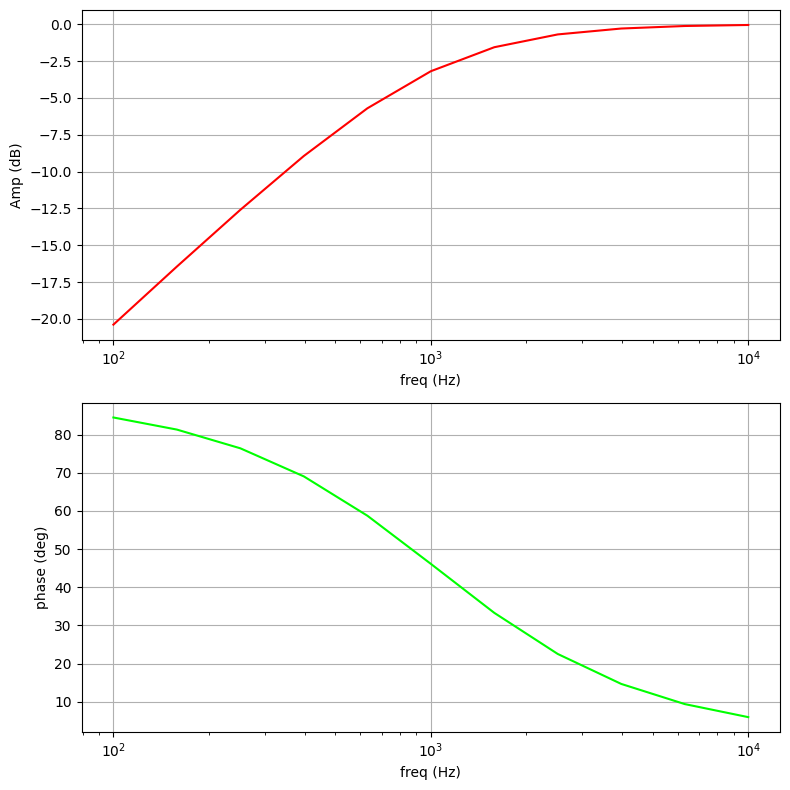

In [21]:
makePhasePlotSim(Filter.freq_sim, Filter.gain_sim, Filter.phase_sim)


Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

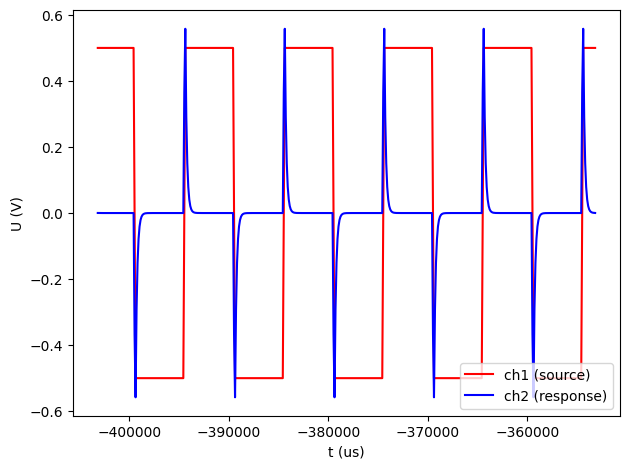

In [22]:
makeOscPlot(Filter.freq_01_sim.t1,Filter.freq_01_sim.ch1,Filter.freq_01_sim.t2,Filter.freq_01_sim.ch2 ,offset=740000)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

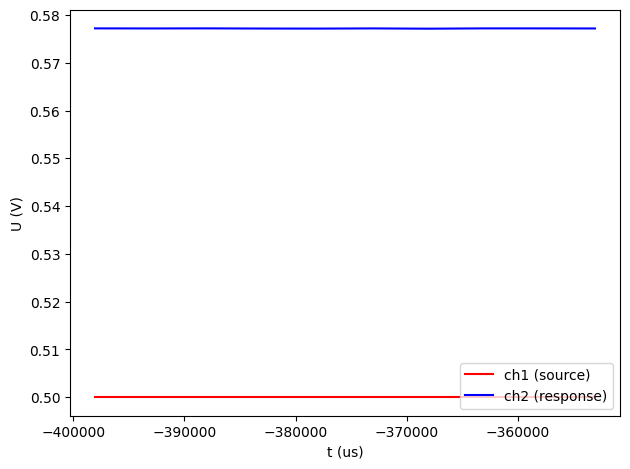

In [31]:
makeOscPlot(Filter.freq_10_sim.t1,Filter.freq_10_sim.ch1,Filter.freq_10_sim.t2,Filter.freq_10_sim.ch2 ,offset=740000)

### Pomiar
Wykres charakterystyki fazowej i amplitudowej.

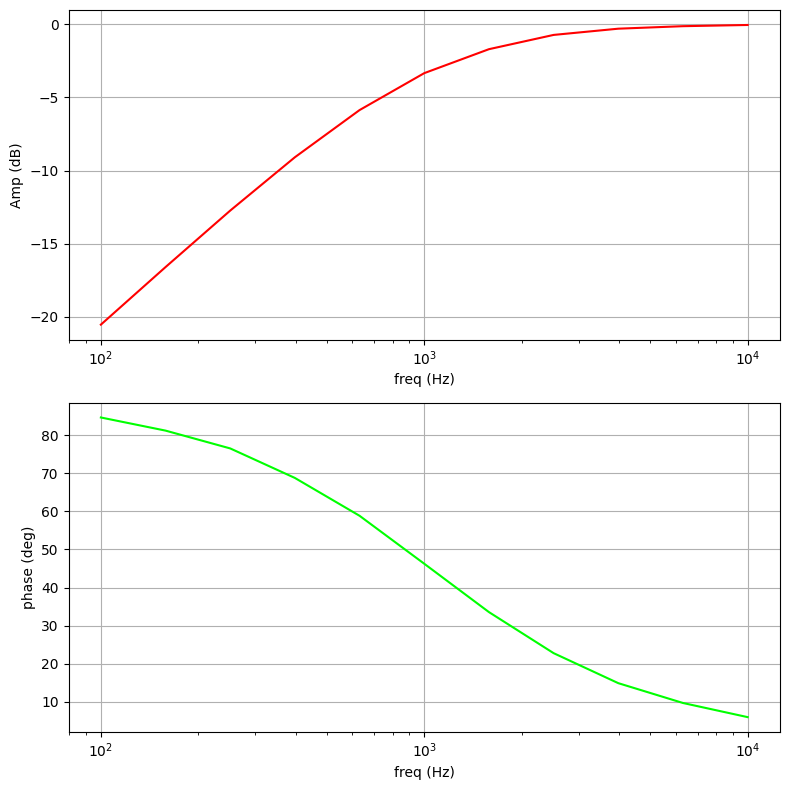

In [26]:
makePhasePlotSim(Filter.freq_data, Filter.gain_data, Filter.phase_data)

Odpowiedź układu na sygnał prostokątny o częstotliwośi 0.1 fg

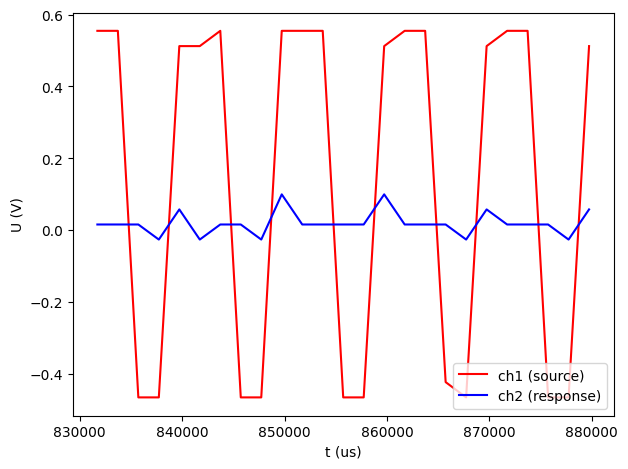

In [24]:
makeOscPlot(Filter.freq_01_data.t1,Filter.freq_01_data.ch1,Filter.freq_01_data.t2,Filter.freq_01_data.ch2 )

Odpowiedź układu na sygnał prostokątny o częstotliwośi 10 fg

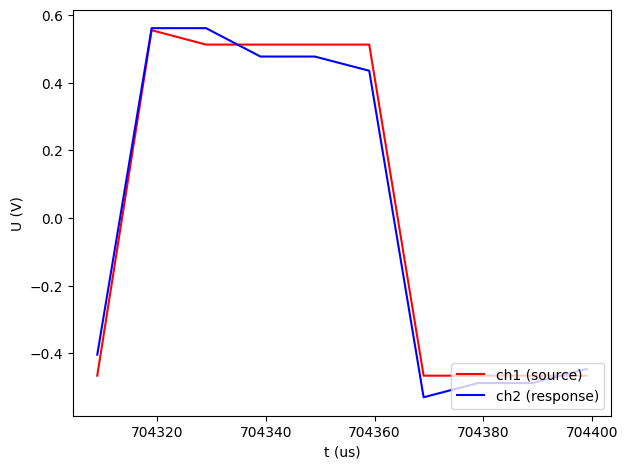

In [25]:
makeOscPlot(Filter.freq_10_data.t1,Filter.freq_10_data.ch1,Filter.freq_10_data.t2,Filter.freq_10_data.ch2 )